# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#step0">Step 0: Load the Data</a></li>
<ul>
    <li><a href="#AzdiasExplore">Step 0.1: Exploration of Azdias demographic data (azdias)</a></li>
    <li><a href="#FeatSummaryExplore">Step 0.2: Features summary definition (Data_Dictionary table)</a></li>
    <li><a href="#FeatInfoExplore">Step 0.3: Exploration of the Features summary (feat_info)</a></li>
    <li><a href="#CustomersExplore">Step 0.4: Exploration of the Customers subset (customers)</a></li>
    <li><a href="#IntuitionExplore">Step 0.5: Assessing and Building Intuition</a></li>
</ul>
<li><a href="#step1">Step 1: Preprocessing</a></li>
    <ul>
    <li><a href="#step1.1">Step 1.1: Assess Missing Data</a></li>
        <ul>
        <li><a href="#step1.1.1">Step 1.1.1: Convert Missing Value Codes to NaNs</a></li>
        <li><a href="#step1.1.2">Step 1.1.2: Assess Missing Data in Each Column</a></li>
        <li><a href="#step1.1.3">Step 1.1.3: Assess Missing Data in Each Row</a></li>
        </ul>
    <li><a href="#step1.2">Step 1.2: Select and Re-Encode Features</a></li>
        <ul>
        <li><a href="#step1.2.1">Step 1.2.1: Re-Encode Categorical Features</a></li>
            <ul>
            <li><a href="#step1.2.1.1">Step 1.2.1.1: Re-Encode multi-level categorical data</a></li>
            <li><a href="#step1.2.1.2">Step 1.2.1.2: Re-Encode binary data</a></li>
        </ul>           
        <li><a href="#question2b">Impacts of population growth on environmental metrics</a></li>
        <li><a href="#question2c">Impacts of HDI on human resources consumption and demand</a></li>
        <li><a href="#question2d">Subsidiary question : comparison of forest expansion with human reforestation</a></li>
        </ul>
    <li><a href="#question3">Question 3: analysis of country trends for 'low' to 'high' HDI and SDI classes values</a></li>
    <li><a href="#question4">Question 4: bivariate correlation of HDI and SDI</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In order to achieve a continuous growth in 2023, UDAgoods is looking at the German market which represents the largest e-commerce market in Europe
(with $73.6 billion in sales in 2020). Germany also ranks first in terms of the number of online shoppers and is among the international leaders in terms of annual spending per shopper. In addition to a strong retail sector, German e-commerce grew a full 6.6 times as fast as offline retail in 2020.

Besides the opportunity that this new market tackling could represent in terms of competitiveness and profits, a new mail-order sales deployment on the German market could offer UDAgoods new perspectives with regards to product and market diversification.

To support our decisions, UDAgoods requests to the Marketing Service a **preliminary market research**, which intends to:
- better understand the characteristics and preferences of our new customers
- identify opportunities to increase sales and grow our business
- monitor the level of competition in this enw market
- reduce the risk in our business decisions
- develop and complete our business plan

The environment that our business operates in can be very dynamic. The shifts of economic conditions, demographic changes, new regulations and changes in technology that the German market represents shall be taken into account to better anticipate the new mail-ordering system.

To support this market analysis, UDAtronics established a commercial agreement Bertelsmann Arvato Analytics so as to get access to the official demographics data for the general population of Germany. 

This report presents the results of this perliminary market research which intends to anticipate the new advertising campaign and prepare the future mail-order service deployment.

In [108]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

In [109]:
# Setting display to show all rows
#pd.options.display.max_rows = 260

<a id='step0'></a>
## Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [110]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')

# Load in the customers of a mail-order company data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep=';')

<a id='AzdiasExplore'></a>
### Step 0.1: Exploration of Azdias demographic data

Let us first explore the Azdias demographics data for the general population of Germany and have a look to the general content of the dataset, of the types of feature and completeness of the dataset.

In [111]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
azdias.head(10).T

,0,1,2,3,4,5,6,7,8,9
AGER_TYP,-1,-1,-1,2,-1,3,-1,-1,-1,-1
ALTERSKATEGORIE_GROB,2,1,3,4,3,1,2,1,3,3
ANREDE_KZ,1,2,2,2,1,2,2,1,1,2
CJT_GESAMTTYP,2,5,3,2,5,2,5,3,3,4
FINANZ_MINIMALIST,3,1,1,4,4,3,1,3,4,2
...,...,...,...,...,...,...,...,...,...,...
PLZ8_HHZ,NaN,5,4,3,3,5,5,4,3,3
PLZ8_GBZ,NaN,4,4,4,3,5,5,4,3,3
ARBEIT,NaN,3,3,2,4,2,4,2,2,2
ORTSGR_KLS9,NaN,5,5,3,6,3,6,5,4,3


First, we can observe that the `Udacity_AZDIAS_Subset.csv`, here loaded as `Àzdidas` dataframe, contains many multiple and different types of features about our German population. The columns (or features) names, which may appear a bit "cryptic" as a first sight, require a further analysis throughout the `Data_Dictionary.md` file, describing each feature independently.

Based on this dictionnary, we can see that the features are split in 8 main categories:
- **person**: containing information related to gender, financial and health typologies, social status, mind affinity, and so on;
- **household**: presented number of people in the household, estimated household income, transaction activities, and many more household aspects;
- **building level**: referring to the building of the household, type, number of household per building, neighborhood quality, etc.;
- **microcell**: different CAMEO consumer classifications, more especially on wealth which includes the life-stage, standard living and typology of household;
- **macrocell**: density of inhabitants, distance from city center, number of family houses, most common building type, etc.;
- **postcode** : mainly information about the Postcode-level features including the distance to the nearest urban center, the density of households, and distance to city center;
- **region** : similar to postcode, but at region scale. Provides further information about the ratio of residentials to commercial activity, the purchasing power in the region, movement patterns, etc.;
- **community**: inhabitants, the share of unemployed people, and so on.

In [112]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

Looking more closely at the features types, we are able to identify 891221 entries, where each corresponds to an individual of the census population, and 85 columns, reflecting the individuals respective features.

Immediately, we however notice that same features reveal missing (or null) values.
It may be useful to remind that these null values may bias the analysis of the data and also significantly impact the variability of the features when dealing with clustering. 

So as to see if this can be considered as an isolated case, let's see how large the quantity of missing value is.

In [113]:
# Plot percent rate of missing value per feature
def plot_nas(df: pd.DataFrame):
    '''
    Plots the percentage of missing values per column in a given dataframe.
    Only shows the column containing missing values.
    The count of missing values is sorted by descending order.
    
    INPUT: df - dataframe to be plotted
    
    OUTPUT: none
    '''    
    if df.isnull().sum().sum() != 0:
        # Calculate the mean of null values (in pct) for each feature and store it into a new dataframe na_df
        na_df = (df.isnull().sum() / len(df)) * 100
        # Drop the index of na_df if number of missing values is 0
        # Then sort na_df by ascending order
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        # Create a dictionnary with key : 'Missing Ratio (in %)' and convert it back into dataframe
        # Convert it back into dataframe named missing_data
        missing_data = pd.DataFrame({'Missing Ratio (in %)' :na_df})
        # Plot na_df using a horizontal bar graph
        missing_data.plot(kind = "barh", figsize=(6,10))
        plt.show()
    else:
        print('No NAs found')

def print_nas(df: pd.DataFrame):
    '''
    Computes the percentage of missing values per column in a given dataframe.
    Only shows the column containing missing values.
    The count of missing values is sorted by descending order.
    
    INPUT: df - dataframe to be plotted
    
    OUTPUT: none
    ''' 
    if df.isnull().sum().sum() != 0:
        # Identify missing or unknown data values and convert them to NaNs.

        # Check columns with missing values before any data processing 
        na_df = df.isnull().sum()[df.isnull().sum() != 0]

        na_dict = {'count':  na_df.values, 'pct':np.round(na_df.values *100/len(df),2)}

        na_df = pd.DataFrame(data=na_dict, index=na_df.index)
        na_df.sort_values(by='count', ascending=False, inplace=True)
        print(na_df)
    else:
        print('No NAs found')

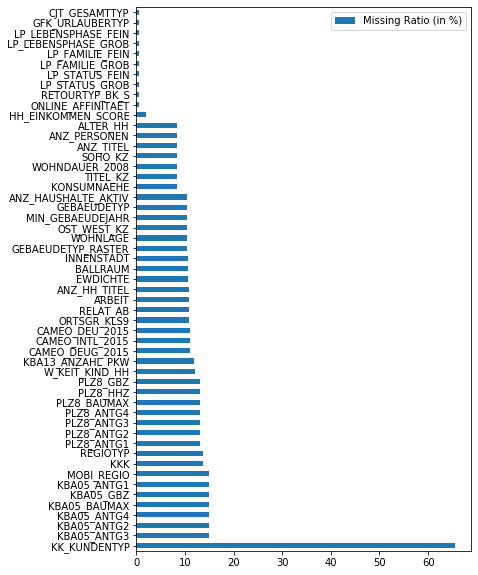

In [114]:
# Call plot_nas on azdias dataframe
plot_nas(azdias)

The bar chart confirms that a large quantity of null entries is affecting our input dataset. Many features are impacted by an amount of 8 up to 15% of null entries, which would represent a huge amount relative to the total number of 891221 lines.
Worst affected is the column `KK_KUNDENTYP` where about 65% of the values are missing.

From this point, we can raise our interest to the `feat_info` dataframes and to feature types themselves.

<a id='FeatSummaryExplore'></a>
### Step 0.2: Features summary definition (Data_Dictionary table)

Before moving any further, let's synthesize the main description of the features provided by the `Data_Dictionary.md`. For each categorical data `Data_Dictionary.md` provides the feature assignable values and the respective definition.
Given of this quantity of categorical data, and so as to contrast with the *unknown* or *undetermined* values they may be assigned (which are referred to below as **missing_or_unknown**), we will report the "known" (i.e."valid") values in the last column.

| Category | Feature | Definition | Data type (valid range) |
| :--------------: | :--------- | :----- | :-----: |
| Person-level | AGER_TYP | Best-ager typology | Categorical : [[1;3]]|
| Person-level | ALTERSKATEGORIE_GROB | Estimated age based on given name analysis | Ordinal : [[1;4]] |
| Person-level | ANREDE_KZ | Gender | Categorical : [[1;2]]|
| Person-level | CJT_GESAMTTYP | Customer-Journey-Typology: preferred information and buying channels for consumer | Categorical : [[1;6]]|
| Person-level | FINANZ_XXX | Financial typology where XXX as: |  Ordinal : [[1;5]]|
|||-MINIMALIST: low financial interest | Ordinal : [[1;5]]|
|||-SPARER: money-saver | Ordinal : [[1;5]]|
|||-VORSORGER: be prepared | Ordinal : [[1;5]]|
|||-ANLEGER: investor | Ordinal : [[1;5]]|
|||-UNAUFFAELLIGER: inconspicuous | Ordinal : [[1;5]]|
|||-HAUSBAUER: home ownership| Ordinal : [[1;5]]|
| Person-level | FINANZTYP | Most descriptive financial type for individual | Categorical : [[1;6]]|
| Person-level | GEBURTSJAHR | Year of birth | Numeric (discrete) |
| Person-level | GFK_URLAUBERTYP | Vacation habits | Categorical : [[1;12]|
| Person-level | GREEN_AVANTGARDE | Membership in environmental sustainability as part of youth | Categorical : [[1;2]]|
| Person-level | HEALTH_TYP | Health typology | Ordinal : [[1;3]]|
| Person-level | LP_LEBENSPHASE_FEIN | Life stage, fine scale |Categorical : [[1;40]]|
| Person-level | LP_LEBENSPHASE_GROB | Life stage, rough scale |Categorical : [[1;12]]|
| Person-level | LP_FAMILIE_FEIN | LP_FAMILIE_FEIN | Categorical : [[1;11]]|
| Person-level | LP_FAMILIE_GROB | LP_FAMILIE_GROB | Categorical : [[1;5]]|
| Person-level | LP_STATUS_FEIN | Social status, fine scale | Categorical : [[1;10]]|
| Person-level | LP_STATUS_GROB | Social status, rough scale | Categorical : [[1;5]]|
| Person-level | NATIONALITAET_KZ | Nationality based on given name analysis | Categorical : [[1;3]]|
| Person-level | PRAEGENDE_JUGENDJAHRE | Dominating movement of person's youth (avantgarde vs. mainstream; east vs. west) | Categorical : [[1;15]]|
| Person-level | RETOURTYP_BK_S | Return type | Ordinal : [[1;5]]|
| Person-level | SEMIO_XXX | Personality typology where XXX as: |  Ordinal : [[1;7]]|
|||-SOZ: socially-minded | Ordinal : [[1;7]]|
|||-FAM: family-minded | Ordinal : [[1;7]]|
|||-REL: religious | Ordinal : [[1;7]]|
|||-MAT: materialistic | Ordinal : [[1;7]]|
|||-VERT: dreamful | Ordinal : [[1;7]]|
|||-LUST: sensual-minded| Ordinal : [[1;7]]|
|||-ERL: event-oriented | Ordinal : [[1;7]]|
|||-KULT: cultural-minded | Ordinal : [[1;7]]|
|||-RAT: rational | Ordinal : [[1;7]]|
|||-KRIT: critical-minded | Ordinal : [[1;7]]|
|||-DOM: dominant-minded | Ordinal : [[1;7]]|
|||-KAEM: combative attitude| Ordinal : [[1;7]]|
|||-PFLICHT: dutiful | Ordinal : [[1;7]]|
|||-TRADV: tradional-minded| Ordinal : [[1;7]]|
|||-DOM: dominant-minded | Ordinal : [[1;7]]|
|||-KAEM: combative attitude| Ordinal : [[1;7]]|
|||-PFLICHT: dutiful | Ordinal : [[1;7]]|
|||-TRADV: tradional-minded| Ordinal : [[1;7]]|
| Person-level | SHOPPER_TYP | Shopper typology | Categorical : [[0;3]]|
| Person-level | SOHO_KZ | Small office / home office flag | Categorical : [[0;1]]|
| Person-level | TITEL_KZ | Academic title flag | Categorical : [[0;5]]|
| Person-level | VERS_TYP | Insurance typology | Categorical : [[1;2]]|
| Person-level | ZABEOTYP | Energy consumption typology | Categorical : [[1;9]]|
| Household-level | ALTER_HH | Birthdate of head of household | Categorical : [[1;21]]|
| Household-level | ANZ_PERSONEN | Shopper typology | Numeric (discrete)|
| Household-level | ANZ_TITEL | Number of professional academic title holders in household | Numeric (discrete)|
| Household-level | HH_EINKOMMEN_SCORE | Estimated household net income | Ordinal : [[1;6]]|
| Household-level | KK_KUNDENTYP | Consumer pattern over past 12 months | Categorical : [[1;6]]|
| Household-level | W_KEIT_KIND_HH | Likelihood of children in household | in household | Numeric (discrete)|
| Household-level | HH_EINKOMMEN_SCORE | Estimated household net income | Ordinal : [[1;6]]|
| Household-level | KK_KUNDENTYP | Consumer pattern over past 12 months | Categorical : [[1;6]]|
| Household-level | W_KEIT_KIND_HH | Likelihood of children in household | Ordinal : [[1;6]]|
| Household-level | WOHNDAUER_2008 | Length of residence | Ordinal : [[1;9]]|
| Building-level | ANZ_HAUSHALTE_AKTIV | Number of households in the building | Numeric (discrete)|
| Building-level | ANZ_HH_TITEL | Number of professional academic title holders in building| Numeric (discrete)|
| Building-level | GEBAEUDETYP | Type of building (residential vs. commercial) | Categorical : [[1;8]]|
| Building-level | KONSUMNAEHE | Distance from building to point of sale (PoS) | Ordinal : [[1;7]]|
| Building-level | MIN_GEBAEUDEJAHR | First year building was mentioned in the database | Numeric (discrete)|
| Building-level | OST_WEST_KZ | Building location via former East / West Germany (GDR / FRG) | Categorical : {O;W}|
| Building-level | WOHNLAGE | Neighborhood quality (or rural flag) | Categorical : [[1;8]]|
| Micro-cell | CAMEO_DEUG_2015 | German CAMEO: Wealth / Life Stage Typology, rough scale | Categorical : [[1;9]]|
| Micro-cell | CAMEO_DEU_2015 | German CAMEO: Wealth / Life Stage Typology, detailed scale | Categorical : [[1(A-E);9(A-E)]]|
| Micro-cell | CAMEO_INTL_2015 | German CAMEO: Wealth / Life Stage Typology, mapped to international code | Categorical : [x1;x5] with x: 1 to 5|
| Micro-cell | KBA05_ANTG1 | Number of 1-2 family houses in the microcell | Ordinal : [[0;4]]|
| Micro-cell | KBA05_ANTG2 | Number of 3-5 family houses in the microcell | Ordinal : [[0;4]]|
| Micro-cell | KBA05_ANTG3 | Number of 6-10 family houses in the microcell | Ordinal : [[0;4]]|
| Micro-cell | KBA05_ANTG4 | Number of 10+ family houses in the microcell | Ordinal : [[0;4]]|
| Micro-cell | KBA05_BAUMAX | Most common building type within the microcell | Categorical : [[1;5]]|
| Micro-cell | KBA05_GBZ | Number of buildings in the microcell | Ordinal : [[1;5]]|
| Postcode-level | BALLRAUM | Distance to nearest urban center | Ordinal : [[1;7]]|
| Postcode-level | EWDICHTE | Density of households per square kilometer | Ordinal : [[1;6]]|
| Postcode-level | INNENSTADT | Distance to city center (downtown) | Ordinal : [[1;8]]|
| Region | GEBAEUDETYP_RASTER | Ratio of residential to commercial activity | Ordinal : [[1;5]]|
| Region | KKK | Purchasing power in region | Ordinal : [[1;4]]|
| Region | MOBI_REGIO | Movement patterns | Ordinal : [[1;6]]|
| Region | ONLINE_AFFINITAET | Online affinity | Ordinal : [[1;5]]|
| Region | REGIOTYP | Neighborhood typology | Ordinal : [[1;7]]|
| Macro-cell | KBA13_ANZAHL_PKW | Number of cars in the PLZ8 region | Numeric (discrete)|
| Macro-cell | PLZ8_ANTG1 | Number of 1-2 family houses in the PLZ8 region | Ordinal : [[0;4]]|
| Macro-cell | PLZ8_ANTG2 | Number of 3-5 family houses in the PLZ8 region | Ordinal : [[0;4]]|
| Macro-cell | PLZ8_ANTG3 | Number of 6-10 family houses in the PLZ8 region | Ordinal : [[0;3]]|
| Macro-cell | PLZ8_ANTG4 | Number of 10+ family houses in the PLZ8 region | Ordinal : [[0;2]]|
| Macro-cell | PLZ8_BAUMAX | Most common building type within the PLZ8 region | Categorical : [[1;5]]|
| Macro-cell | PLZ8_HHZ | Number of households within the PLZ8 region | Ordinal : [[1;5]]|
| Macro-cell | PLZ8_GBZ | Number of buildings within the PLZ8 region | Ordinal : [[1;5]]|
| Community-level | ARBEIT | Share of unemployment in community | Ordinal : [[1;9]]|
| Community-level | ORTSGR_KLS9 | Size of community | Ordinal : [[1;9]]|
| Community-level | RELAT_AB | Share of unemployment relative to county in which community is contained | Ordinal : [[1;9]]|

<a id='FeatInfoExplore'></a>
### Step 0.3: Exploration of the Features summary (feat_info)

The `AZDIAS_Feature_Summary.csv` file, loaded as `feat_info`dataframe provide us with complementary details about each features of the azdias demographic data.
For each attribute, the **information_level** column defines the category of the feature, whereas the feature data type is reported by the **type** column index.

In [115]:
feat_info.tail(40)

,attribute,information_level,type,missing_or_unknown
45,ANZ_TITEL,household,numeric,[]
46,HH_EINKOMMEN_SCORE,household,ordinal,"[-1,0]"
47,KK_KUNDENTYP,household,categorical,[-1]
48,W_KEIT_KIND_HH,household,ordinal,"[-1,0]"
49,WOHNDAUER_2008,household,ordinal,"[-1,0]"
50,ANZ_HAUSHALTE_AKTIV,building,numeric,[0]
51,ANZ_HH_TITEL,building,numeric,[]
52,GEBAEUDETYP,building,categorical,"[-1,0]"
53,KONSUMNAEHE,building,ordinal,[]
54,MIN_GEBAEUDEJAHR,building,numeric,[0]


Where the following unique values can be identified in the **type** column :

In [116]:
feat_info.type.unique()

array(['categorical', 'ordinal', 'numeric', 'mixed', 'interval'],
      dtype=object)

As we can see right below, the **type** column contains 5 unique values, namely, data formats for the features of the demographic dataset. These are:
- "categorical"
- "ordinal"
- "numeric"
- "mixed"
- "interval"

First observation: the *numeric* type matches what we reported in the description table for the features **ANZ_TITEL**, **ANZ_PERSONEN**, **ANZ_HH_TITEL**,**ANZ_HAUSHALTE_AKTIV**, **GEBURTSJAHR**, **MIN_GEBAEUDEJAHR** and **KBA13_ANZAHL_PKW**.
In the same manner, the values reported in type *ordinal* in `feat_info` are assigned to the same type of categorical data in our Data_Dictionary table.

For the other types, some differences might be observed though:
- **ALTER_HH**, defining the birthdate of head of household is reported as "interval" in `feat_info` but as categorical data in our own synthesis. Even though the values from 1 to 21 would represent a continuous date interval (from 1895 to 1995) this value remains a categorical one computationally speaking.
- there are 7 features of `feat_info` defined as *mixed*. These are actually a mixture of ordinal and nominal categorical data (ex: **CAMEO_DEU-2015**, representative of the relative wealth and situation of the person is given a value of 0–9A-E). In a sense of data processing, these are actually referring to nominal categorical data.

From this point, we can see that the **missing_or_unknown** column in `feat_info` provides for each attribute the value it is assigned when the feature is *unknown* or *undetermined*. At our level, this values may be seen as a *null* or *NaN* value.

<a id='CustomersExplore'></a>
### Step 0.4: Exploration of the Customers subset (customers)

It seems logical that the ctuomers subset provides the same data as the demographic `azdias` dataframe since it uniformizes the same features for the mail-order company.

In [117]:
customers.head().T

,0,1,2,3,4
AGER_TYP,2,-1,-1,1,-1
ALTERSKATEGORIE_GROB,4,4,4,4,3
ANREDE_KZ,1,1,2,1,1
CJT_GESAMTTYP,5,NaN,2,2,6
FINANZ_MINIMALIST,5,5,5,5,3
...,...,...,...,...,...
PLZ8_HHZ,5,NaN,3,3,3
PLZ8_GBZ,5,NaN,2,4,3
ARBEIT,1,NaN,3,1,3
ORTSGR_KLS9,2,NaN,5,3,5


In [118]:
customers.shape

(191652, 85)

As it can be observed, we find back our 85 independent features. However, this time the dataframe contains a distinct number of entries which is 191652. This value yet corresponds to the number of customers which used in the past (or suscribed) the mail-ordering system.

To see if the same issue or null and NaN values also impacts this dataframe, let us compare the number of missing values in `customers`.

In [119]:
# Plot percent rate of missing value per feature
def plot_nas_compare(df_main: pd.DataFrame, df_comp: pd.DataFrame, df1_name ="main dataframe", df2_name="secondary dataframe"):
    '''
    Plots the comparative histogram of missing values per feature in two distinct daframes.
    Only shows the column containing missing values.
    The count of missing values is sorted by descending order.
    
    INPUT: df_main - main dataframe taken as baseline
           df1_name - name of main dataframe (as string)
           df_comp - secondary dataframe to be compared
           df2_name - name of secondary dataframe (as string)

    OUTPUT: none
    '''
    if ((set(df_main.columns) == set(df_comp.columns)) and df_main.isnull().sum().sum() != 0):
        # Calculate the mean of null values per feature (in pct) for each dataframes and and store it into df_main and df_comp
        df_main = (df_main.isnull().sum() / len(df_main)) * 100
        df_comp = (df_comp.isnull().sum() / len(df_comp)) * 100
        # Drop the index of df_main and df_comp if number of missing values is 0
        df_main = df_main.drop(df_main[df_main == 0].index)
        df_comp = df_comp.drop(df_comp[df_comp == 0].index)
        # Stores the 2 new dataframes in a dictionary with 2 keys : df1_name and df2_name 
        # Convert it back into dataframe named missing_data
        missing_data = pd.DataFrame({df1_name :df_main, df2_name:df_comp})
        missing_data_sorted = missing_data.sort_values(df1_name)
        # Plot missing_data using a horizontal bar graph
        missing_data_sorted.plot(kind = "barh", figsize=(6,20))
        plt.xlabel("Missing ratio (in %)")
        plt.show()
    else:
        print('No NAs found')

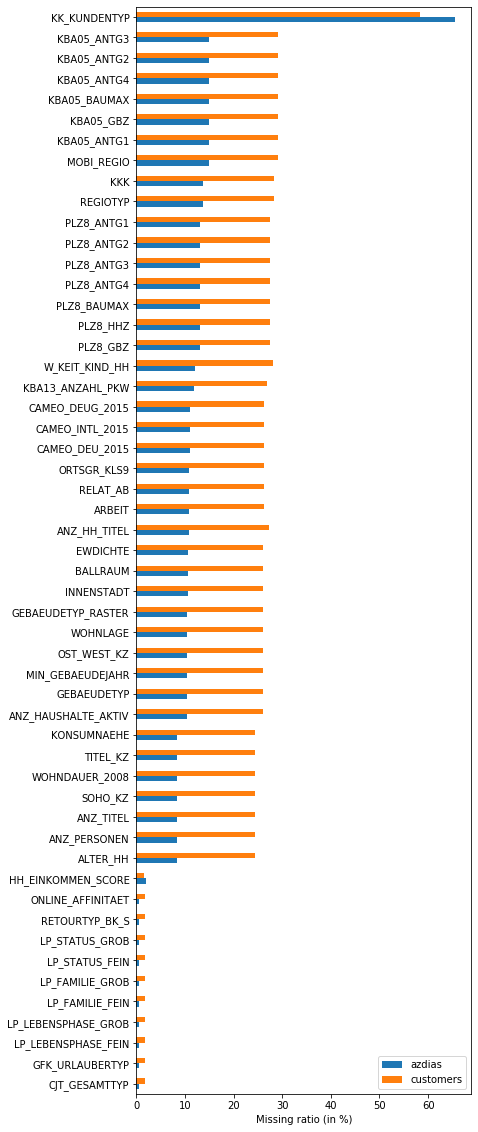

In [120]:
plot_nas_compare(azdias, customers, "azdias", "customers")

It is interesting to see that the `customers` dataframe is impacted by the same issue of missing values as our main azdias demographic dataset.
Whereas our **KK_KUNDENTYP** column shows a slightly lower ratio of missing values than that for `azdias`, all the other categories seem to be affected by the same problem but at an even larger level (with 25% up to 30% of missing values in many columns).

<a id='IntuitionExplore'></a>
### Step 0.5: Assessing and Building Intuition

This brings us to the interesting part of the analysis.
So as to optimize the mail-ordering campaign, it is usefull to better identify the trends of our new potential customers.

Whereas the Machine Learning algorithm we will build in the next part of our analysis will allow to reveal the close clusters of this new market share, we can already emit some hypotheses about the features which are more likely to influence or reveal the active mail-ordering users as well as potential customer targets.
The age, the mobility, and the standard level are 3 important features we should be looking at for orienting the marketing strategy, but there may be many others (which are not necessarily statistically independent).

As a first assessment, we can assume directions and especially extract some insights on customers’ characteristics in comparison to the general population.

A few questions to guide this exploratory data analysis task:
- How old are the customers?
- How are they classified while consumers?
- What about their incomes?
- What are their consumption habits?

In [121]:
def plot_counts(df_main: pd.DataFrame, df_comp: pd.DataFrame, df1_name ="main dataframe", df2_name="secondary dataframe", col="count (in %)"):
    '''
    Plots the count of value for a given column for two distinct daframes.
    (Expects 2 dataframes with identical columns)
    
    INPUT: df_main - main dataframe taken as baseline
           df1_name - name of main dataframe (as string)
           df_comp - secondary dataframe to be compared
           df2_name - name of secondary dataframe (as string)
           col - name of the column counts to plot (as string)

    OUTPUT: none
    '''
    #sns.set(font_scale=1.4)
    
    #Calculate the value_count for each unique value of the column 'col' in our 2 distinct dataframes
    #Result is overwritten in the same dataframes
    df_main = (df_main[col].value_counts().sort_index() / len(df_main)) * 100
    df_comp = (df_comp[col].value_counts() / len(df_comp)) * 100

    # Stores the 2 new dataframes in a dictionary with 2 keys : df1_name and df2_name 
    # Convert it back into dataframe named 'count'
    count = pd.DataFrame({df1_name :df_main, df2_name:df_comp})
    # Plot count in a barchart
    count.plot(kind = "bar", figsize=(6, 5))
    plt.title(col)
    plt.xlabel("Feature value")
    plt.ylabel("Count (% of total dataframe)")
    plt.show()
    

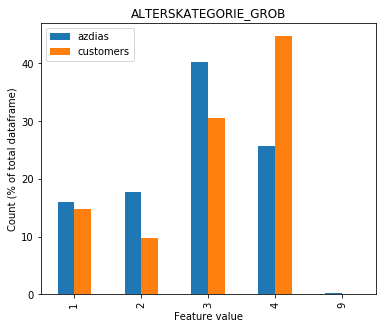

In [122]:
plot_counts(azdias, customers, "azdias", "customers", "ALTERSKATEGORIE_GROB")

As a first insight, we can see that our mail ordering company's targets are prevalent in the 46 and more age group. Whereas 40% of the population is in between 46 and 60 years old in Germany (category 3), which represents a strong basis for our services, an even larger consumption target is created by those over 60 (category 4). The more limited mobility and the rural geographical situation of the older people (families) could explain this criteria.

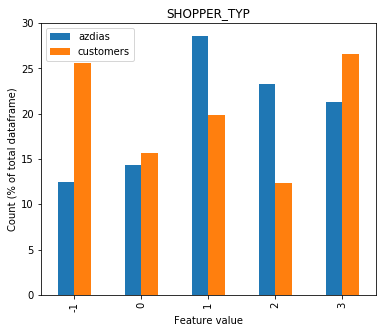

In [123]:
plot_counts(azdias, customers, "azdias", "customers", "SHOPPER_TYP")

Additionally, we can observe that the shopper typology is pretty well balanced. Whereas the German population seems to reflect a larger proportion of "shopping stressed" purchasers (category 1), we can see that the mail-ordering services are more likely to attract the demanding shopper profiles (category 3).
Anyhow, this is not surprising as the ordering system is primarily turning to the more-intensive consumer segment of the population.

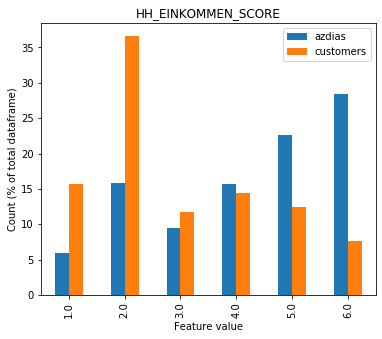

In [124]:
plot_counts(azdias, customers, "azdias", "customers", "HH_EINKOMMEN_SCORE")

As we could predict the income (reflecting the standard of living of the individuals) has a large influence on the consumption and puchasing trends. The income of the German population remains "almost" uniformely spread, in comparison with the global trend. Here, the values are ranging from 1 for the highest income down to 6 for the very low incomes.
It can thus be noticed that the largest customer potential for the mail-ordering companies is often turning towards the very high income (category 2). However, the products and services and marketing strategy of UDAgoods services should not neglect the low and very low incomes since they nevertheless represent almost 50% of the German population.

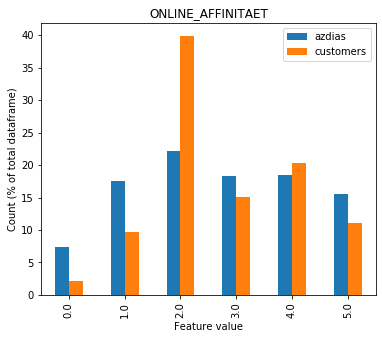

In [125]:
plot_counts(azdias, customers, "azdias", "customers", "ONLINE_AFFINITAET")

Finally, the last barchart reminds the usual trend of the mail orders with respect to the online affinity (scaled from 1 the lowest to 5 the highest), where 40% use to come alone from the people at middle affinity level. The Azdias demographics show that at local level the individuals' online affinity is very well balanced where each affinity level represents roughly 20% of the population. Here again, a marketing strategy should not be taken lightly.

> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 
<a id='Step1'></a>

## Step 1: Preprocessing

<a id='Step1.1'></a>

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

<a id='Step1.1.0'></a>
#### Step 1.1.0: Rectification of "nan" strings

Prior to enter the details of the missing value vodes in following part, a first inconsistency needs to be corrected. In part [S0.1](#AzdiasExplore), a first count of the NaN value in the `azdias` demographic data was achieved. At this stage, a part of the null entries was omitted from the count.To be more accurate, a closer look to the internal content of the dataframe can let oversee that the dataframe contains "nan" as string fields, not standardized with Numpy **NaN** data type.
Here is an example :

In [126]:
azdias['CJT_GESAMTTYP'].unique()

array([ 2.,  5.,  3.,  4.,  1.,  6., nan])

These misleading "nan" strings, not conform with the *np.nan* null type, are not identifiable as *null* in the dataset using standard Numpy functions. So as not to go through these lying entries when counting and processing the nulls, a standardization is required.

In [127]:
azdias['CJT_GESAMTTYP'].isna().sum()

4854

<a id='Step1.1.1'></a>
#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

As we could see in [S0.3](#FeatInfoExplore), the column **missing_or_unknown** of the `feat_info` dataframe provides each attribute the value it is assigned when the feature is *unknown* or *undetermined*. This specific values shall then be considered as "missing values codes". More particularly, we could extract the following set of values:

In [128]:
# find out the different kind of encodings
feat_info.missing_or_unknown.unique()

array(['[-1,0]', '[-1,0,9]', '[0]', '[-1]', '[]', '[-1,9]', '[-1,X]',
       '[XX]', '[-1,XX]'], dtype=object)

Interesting to see that beyond the numerical values which are reflected in the `Data_Dictionary.md` for the missing value codes, we can also identify and extract additional specific 'X’ and ‘XX’ values. As for the other ones, these are also interpreted as *unknown* or *undetermined* entries.

It may be useful to point out that the **missing_or_unknown** column does not contain an array of array of missing value codes. Instead, this column is an array of strings. 
From this point and to go into further depth on the data analysis, all the missing value codes listed in `feat_info` will have to be extracted and identified so as to convert the corresponding values in `azdias` to standard NaN type, interpretable as "null" entries by our Python libraries.

In [129]:
# Identify missing or unknown data values and convert them to NaNs.
def parseAzdiasFeatMissingValuecodes(df = feat_info):
    '''Parses the missing value codes defined by the 'missing_or_unknown' of AZDIAS_Feature_Summary.csv
    
    INPUT: df - dataframe corresponding to the AZDIAS_Feature_Summary.csv file (default = feat_info)
    OUTPUT: none
    '''
    df['missing_or_unknown'] = df['missing_or_unknown'].apply(lambda x: x[1:-1].split(','))

In [130]:
def replaceAzdiasMissingValuecodes(df_azdias = azdias, df_features = feat_info):
    '''replaces the missing value codes by NaN values in AZDIAS_Subset.csv dataframe
    
    INPUT: df_azdias - dataframe corresponding to the AZDIAS_Subset.csv file (default = azdias)
           df_missingvalcodes - dataframe corresponding to the AZDIAS_Feature_Summary.csv file (default = feat_info)
               requires parsed values in 'missing_or_unknown' column
           
    OUTPUT: df_azdias
    '''
    for attribute, missing_value_codes in zip(df_features['attribute'], df_features['missing_or_unknown']):
        if missing_value_codes[0] != '':
            for missing_value in missing_value_codes:
                if missing_value.isnumeric() or missing_value.lstrip('-').isnumeric():
                    missing_value = int(missing_value)
                df_azdias.loc[df_azdias[attribute] == missing_value, attribute] = np.nan
    return df_azdias

In [131]:
# call the Azdias feature missing value code parsing
parseAzdiasFeatMissingValuecodes()
# call the NaN replace function after missing value code parsing
azdias = replaceAzdiasMissingValuecodes(azdias, feat_info)

In [132]:
print('Total number of missing values after conversion is {}'.format(azdias.isnull().sum().sum()))

Total number of missing values after conversion is 8373929


<a id='Step1.1.2'></a>
#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

Based on the cleaning operated previously, a good practice is to make sure that our main azdias dataframe now contains np.nan values, instead of the missing value codes.
An look into the dataframe content can give a first insight.

In [133]:
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,NaN,2.0,1.0,2.0,3.0,4.0,3.0,5.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,2.0,5.0,1.0,5.0,2.0,5.0,4.0,5.0,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,NaN,3.0,2.0,3.0,1.0,4.0,1.0,2.0,3.0,5.0,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,NaN,3.0,1.0,5.0,4.0,3.0,4.0,1.0,3.0,2.0,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


To get a more reliable idea of operation achieved previously, let us now compute the sum of NaN and the percentage of NaN per column (i.e. AZDIAS feature). This value will then be compared to the first computation achieved in [S0.1](#AzdiasExplore)

In [134]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

def countNANperColumn(df):
    '''count the number of NaN per column in dataframe
    
    INPUT: df - input dataframe
           
    OUTPUT: none
    '''
    # Extract columns with NaNs
    nan_col = df.isnull().sum()[df.isnull().sum() > 0]

    # Calculate percentage of NaN for each column
    dict_nan = {'sum': nan_col.values, 'percent': np.round(nan_col.values * 100 / len(df), 2)}

    # Build a dataframe including only columns with NaNs
    df_nan = pd.DataFrame(data=dict_nan, index=nan_col.index)

    # Sort by percentage
    df_nan.sort_values(by='percent', ascending=False, inplace=True)

    return df_nan

na_azdias = countNANperColumn(azdias)
na_azdias

,sum,percent
TITEL_KZ,889061,99.76
AGER_TYP,685843,76.96
KK_KUNDENTYP,584612,65.60
KBA05_BAUMAX,476524,53.47
GEBURTSJAHR,392318,44.02
...,...,...
LP_STATUS_FEIN,4854,0.54
GFK_URLAUBERTYP,4854,0.54
CJT_GESAMTTYP,4854,0.54
ONLINE_AFFINITAET,4854,0.54


The value show that we have greatly changed the count of NaN per column since our very first assessment. Whereas we are still around 65% of missing values for the column **KK_KUNDENTYP**, this one is now only in third position whereas the 2 first Azdias features with the highest count of null is now **TITEL_KZ** and **AGER_TYP**.

Plotting the general pattern, a significant difference can be observed with the preliminary results of part [S0.1](#AzdiasExplore).

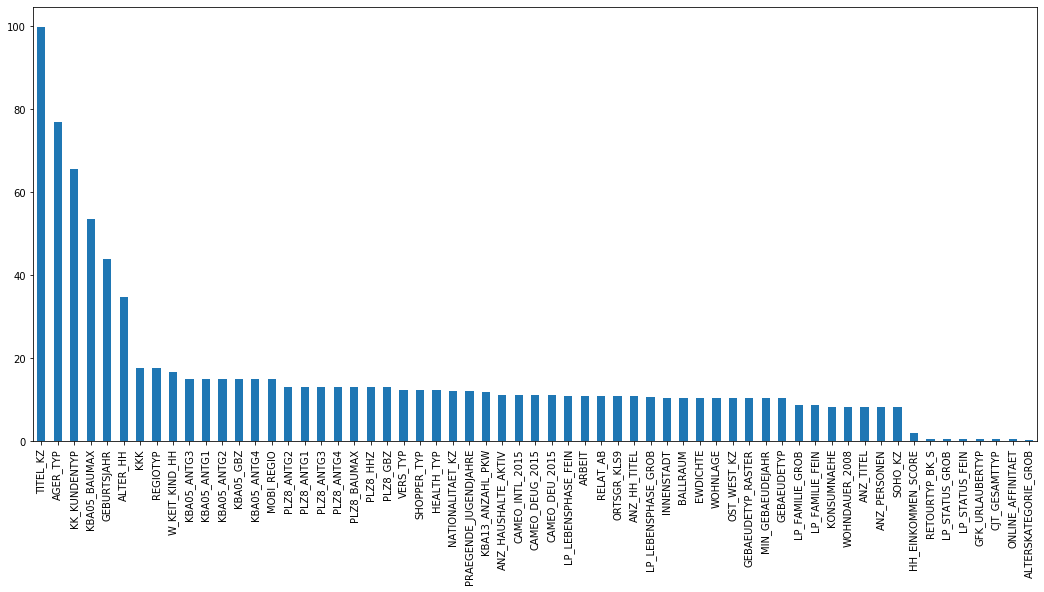

In [135]:
# Investigate patterns in the amount of missing data in each column.
countNANperColumn(azdias).percent.plot.bar(figsize=(18, 8));

Our bar chart highlights the fact many columns have a non-negligible amount of null values. More particularly, we can see that the columns **TITEL_KZ**, **AGER_TYP**, **KK_KUNDENTYP**, **KBA05_BAUMAX**, **GEBURTSJAHR** and **ALTER_HH** are exceeding 35% of NaN values (with respect to the total number of entries of our demographic data).
For sure, working with **TITEL_KZ**, given its amount of missing values is impossible. The same actually applies to the four folllowing columns, where the large proportion of missing data would inevitably skew the analysis and lead to inaccurate results and potential biased clustering.

We can reasonably estimate that these 6 features may not be the most interesting ones in our market analysis, meaning, not the one generating the greatest variability. **KK_KUNDENTYP** as we saw previously, may show specific patterns for the mailing companies. Since this feature is established on the consumer pattern over the 12 last month, it seems logical to have a large number of *unknown* values for individuals which did not purchase quite recently. Furthermore, this parameter may have a large variance from one year to another, which would have made its processing more "subtle".
The other features, in a specific consumption and marketing purpose (for our mail-ordering) are expected of much lower interest. By the way, the data of birth, which could highlight the typology of a given consumer target will obviously by reflected by (some) other features for which statistical independance is not expected.

As a subdidiary remark, it may be useful to point out that in our case, the large amount of missing values does not reflect capture errors but are more representative of not-applicable responses, for which *undetermined* was the only assignable value for some individuals. The privacy aspect may also explain the quantity of *unknown* values for some others (ex: data of birth)

Now, we can see that a number of other columns are tainted by missing values at a proportion of 15% and more. Shall we keep these ones ?

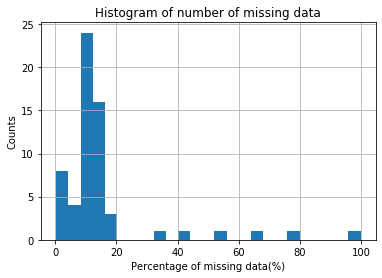

In [136]:
#plot the data as specified/sorted above

plt.hist(countNANperColumn(azdias).percent, bins = 25)

plt.xlabel('Percentage of missing data(%)')
plt.ylabel('Counts')
plt.title('Histogram of number of missing data')
plt.grid(True)
plt.show()

The histogram shows that the largest amount of NaN is observed around 15% of missing data. 
This can be confirmed by looking at the spread of the NaN as below.

In [137]:
# Investigate patterns in the amount of missing data in each column.
countNANperColumn(azdias).describe()

,sum,percent
count,61.000000,61.000000
mean,137277.524590,15.403115
std,157099.496443,17.628423
min,2881.000000,0.320000
25%,93148.000000,10.450000
50%,99352.000000,11.150000
75%,116515.000000,13.070000
max,889061.000000,99.760000


The mean of NaN values is computed at 15% for a total of NaN of 8373929 NaN.
The first quartile is at 10%.
What would then be the impact if we get rid of all the columns containing more than 10% of missing values ?

In [138]:
print("Number of dropped columns if removing all features with more than 10% NaN: {}".format(len(na_azdias[na_azdias['percent']>=10])))

Number of dropped columns if removing all features with more than 10% NaN: 46


In [139]:
na_azdias[na_azdias['percent']>=10]

,sum,percent
TITEL_KZ,889061,99.76
AGER_TYP,685843,76.96
KK_KUNDENTYP,584612,65.60
KBA05_BAUMAX,476524,53.47
GEBURTSJAHR,392318,44.02
ALTER_HH,310267,34.81
KKK,158064,17.74
REGIOTYP,158064,17.74
W_KEIT_KIND_HH,147988,16.61
KBA05_ANTG3,133324,14.96


Dropping all the columns where more than 10% of the values are null would result in major loss of data since 46 of our 85 initial features would be removed. More particularly, when dealing with market and sales, some of these features are expected to have a significant impact to identify a customer target. **SHOPPER_TYP**, or the shopper typology can be mentioned as an example. 

Based on this, a good trade-off is to stick to a removal of the columns only containing more than 25% of NaN entries.

In [140]:
raw_drop_pct = na_azdias.iloc[0:6].sum()['sum'] / azdias.sum().sum()
print("Deletion of the 6 features having the most NaN will result in a loss of {:.1f}% of data over the entire data set".format(raw_drop_pct*100))

Deletion of the 6 features having the most NaN will result in a loss of 0.1% of data over the entire data set


In [141]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
colID = ['TITEL_KZ','AGER_TYP','KK_KUNDENTYP','KBA05_BAUMAX','GEBURTSJAHR','ALTER_HH']
azdias.drop(labels=colID, axis=1, inplace=True)

In [142]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 79 columns):
ALTERSKATEGORIE_GROB     888340 non-null float64
ANREDE_KZ                891221 non-null float64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null float64
FINANZ_SPARER            891221 non-null float64
FINANZ_VORSORGER         891221 non-null float64
FINANZ_ANLEGER           891221 non-null float64
FINANZ_UNAUFFAELLIGER    891221 non-null float64
FINANZ_HAUSBAUER         891221 non-null float64
FINANZTYP                891221 non-null float64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               780025 non-null float64
LP_LEBENSPHASE_FEIN      793589 non-null float64
LP_LEBENSPHASE_GROB      796649 non-null float64
LP_FAMILIE_FEIN          813429 non-null float64
LP_FAMILIE_GROB          813429 non-null float64
LP_STATUS_FEIN           886367 non-null float64
LP_STATUS

#### Discussion 1.1.2: Assess Missing Data in Each Column

The analysis of the missing data in each column, performed in this part, highlighted that the entire dataset initially containing 4,896,838 missing values (defined as numpy NaN and recognized by Pandas) was actually also holding missing value codes, specific to each feature and defined in the `AZDIAS_Feature_Summary.csv`. The conversion of these missing value codes operated on the `azdias` demographic data resulted in an increase of the number of NaN to 8,373,929.

The pattern of null entries for each of the impacted features could reveal that the 6 columns with the highest NaN score can be considered as outliers, considering the very high ratio of missing data they contain.
Even though the 40 other columns are affected by more than 10% of missing data, a drop of these columns would lead to a non-negligible loss of data which would impact our subsequent analysis.

Based on the above, a drop of the following column has be retained on the `azdias` dataframe 
- **KBA05_BAUMAX**
- **KK_KUNDENTYP**
- **ALTER_HH**
- **TITEL_KZ**
- **GEBURTSJAHR**
- **AGER_TYP**

<a id='Step1.1.3'></a>
#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

> Overview

So far, we could identify the column which can be considered as outliers. 
From this point, it may also be useful to assess how much data is missing in each row, in order to evaluate if each individual (corresponding to a given row or the `azdias` dataframe) has a sufficient number of values to benefit from an appropriate clustering.

A special attention mustbe paid at this stage since dropping individual may have  more implications than dropping columns. By the way, dropping rows, implies getting rid of an entire observations (or statistical contributor), which can skew/misrepresent the demographic data.

Now, let us first have an overview of the spread of missing data by rows:

In [143]:
# How much data is missing in each row of the dataset?
# Duplicate the azdias dataframe and add a column 'no_nan' containing the total count of NaN
azdias_cpy = azdias.copy()
azdias_cpy['no_nan'] =  azdias_cpy.isnull().sum(axis=1) 

# What is the ratio of rows without missing data?
nb_rows = len(azdias_cpy['no_nan'])
nb_rows_no_nan = sum(azdias_cpy['no_nan'] == 0)
nb_rows_nan = sum(azdias_cpy['no_nan'] != 0)
pct_rows_no_nan = nb_rows_no_nan * 100 / nb_rows
pct_rows_nan = nb_rows_nan * 100 / nb_rows

print('{}\t -> Number of rows (100%).'.format(nb_rows))
print('{}\t -> Number of rows with missing data ({:0.2f}%).'.format(nb_rows_nan, pct_rows_nan))
print('{}\t -> Number of rows with no missing data ({:0.2f}%).'.format(nb_rows_no_nan, pct_rows_no_nan))

891221	 -> Number of rows (100%).
268012	 -> Number of rows with missing data (30.07%).
623209	 -> Number of rows with no missing data (69.93%).


As a first glance, very large part of the demographic census data is impacted by NaN values, representing a bit more than two third of the rows. 

As we did above, an histogram of the missing values per row will help us to see the distribution over our entire population.

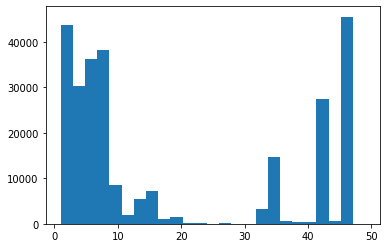

In [144]:
plt.hist(azdias_cpy[azdias_cpy['no_nan'] > 0]['no_nan'],bins=25);

This histogram of missing values reveals that a large amount of rows have no or a "limited" number of NaN values, in between 0 and 8.
Besides, it can also be noticed that a non-negligible quantity of rows also have around 43 to 47 NaN, which is much higher in terms of missing null entries, for a given individual.
Dropping these individuals (to get rid of the rows with the largest amount of NaN) should be duly considered so as not to loose a significant and representative part of our data set.

As we saw above, filtering of the individuals having no missing value would induce keeping only 30% of the original data. Therefore, it appears more relevant to admit a few NaN values per individual and consider the filtering of the data with the largest amount of null.
But to see if this remains an acceptable hypothesys, let us compare the indicators for the individuals in each subset.
Based on our repliminary observations, we will split the data into two subsets, one with rows with less than 30 NaN values and one with rows greater than 30 NaN values.

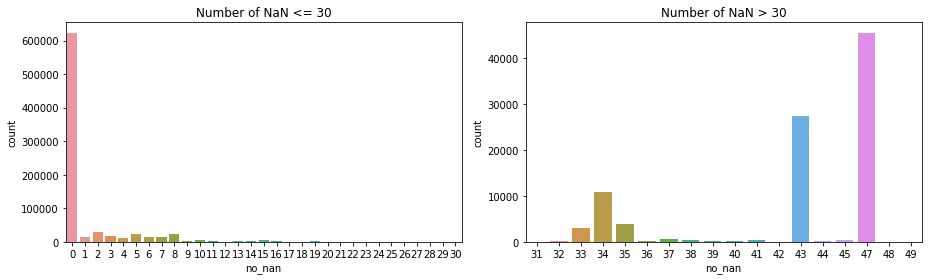

In [145]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
azdias_low_nan = azdias_cpy[azdias_cpy['no_nan']<=30]
azdias_high_nan = azdias_cpy[azdias_cpy['no_nan']>30]

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(13,4))
sns.countplot(x='no_nan', data=azdias_low_nan, ax=ax1,orient='v').set_title("Number of NaN <= 30")
sns.countplot(x='no_nan', data=azdias_high_nan, ax=ax2,orient='v').set_title("Number of NaN > 30")
plt.tight_layout()

In [146]:
# percentage of low na rows
print("Percentage of rows in the first subset : {:0.2f}%".format(azdias_low_nan.shape[0] *100 / len(azdias_cpy)))

Percentage of rows in the first subset : 89.55%


The plot of the histograms of the two subsets highlights the trend we identified previously. For the low NaN subset, we can see that the missing entries are uniformely spread in between 1 and 8, with the 30% of our individuals having no NaN.
For the second subset, of the large NaN, we can identify two clusters, the first in between 2000 and 10000 individuals with approx. 34 NaN but overcome by two groupings of 43 and 47 null.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


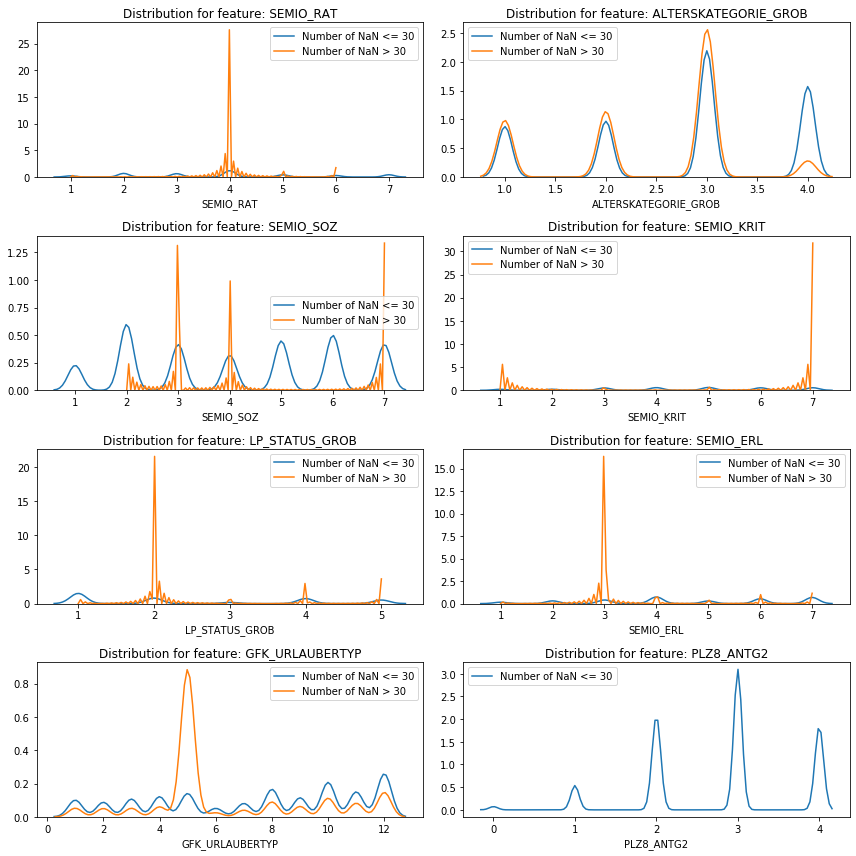

In [147]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.
plt.figure(figsize=(12,12))
for i, col in enumerate(azdias.sample(n=8, random_state=42, axis='columns')):
    plt.subplot(4, 2, i+1)
    sns.distplot(azdias_low_nan[col][azdias_low_nan[col].notnull()], label='Number of NaN <= 30',hist=False)
    sns.distplot(azdias_high_nan[col][azdias_high_nan[col].notnull()], label='Number of NaN > 30',hist=False)
    plt.title('Distribution for feature: {}'.format(col))
    plt.legend();
    
plt.tight_layout()
plt.show()


Based on a random choice of 8 features (which resulted **here** in the draw of the columns **SEMIO_RAT**, **SEMIO_SOZ**, **LP_STATUS_GROB**, **GFK_URLAUBERTYP**, **ALTERSKATEGORIE_GROB**, **SEMIO_KRIT**, **SEMIO_ERL** and **PLZ8_ANTG2**), we can see that the distribution of the NaN values in the two subsets might really depend on the type and categorie of feature.
Interestingly, and more particularly on the ordinal features, we can see that some columns have the NaN value specifically centered on a given assignable value. This is logical and shall result from the replacement of the missing value codes by the numpy NaN we operated previously.
In a completely different way, some other columns exhibit missing values which are more equally spread over the different assignable values. It may also be pointed out that some columns can highlight different weighting of NaN in each direction (0 or the maximum of 30 NaN in the first subset, as well as 0 up to a maximum in the second subset). _A representative example of this is for **PLZ8_ANTG2** which only have NaN missing entries in the low NaN subset._

To evaluate the independancy of our two datasets, and demonstrate that they do not follow the same distributions, let us apply the two-sample Kolmogorov-Smirnov (KS) test.
As a reminder, the Kolmogorov-Smirnov test allows us to compare two samples, and tells us the chance they both come from the same distribution. 
The null hypothesis is H0: both samples come from a population with the same distribution.
By computing the p-value with the significance for all the features, let-us evaluate the null hypothesis for each criteria.

In [148]:
#apply the Kolmogorov-Smirnov Test
def two_sample_KS(df1, df2):
    '''
    Used to evaluate whether distributions of data between two DataFrames with the same columns are different.
    
    Input: 2 DataFrames with identical columns.
    Output: D (KS Stat | Max Distance between the two cumulative probability functions for each Dataset) and p-values associated to each D 
    '''
    # Lists for the KS Stat (D) and p-values to return
    ktest = []
    pvalues = []
    
    cols = df1.columns.values
    
    for col in cols:
        try:
            value, pvalue = stats.ks_2samp(df1[col], df2[col])
            ktest.append(value)
            pvalues.append(pvalue)
            #print(col, ": ", Ktest, pvalues)
        except:
            ktest.append(np.NaN)
            pvalues.append(np.NaN)
    
    return ktest, pvalues

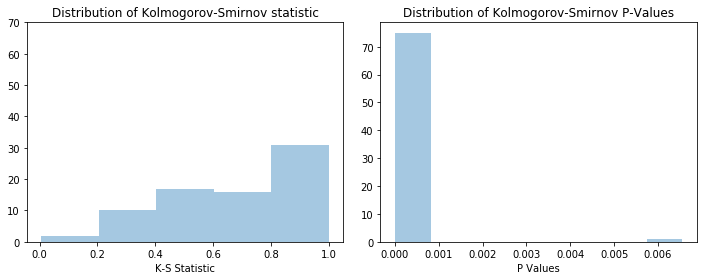

In [149]:
# Calculating stats and p-values for each column
ktest, pvalues = two_sample_KS(azdias_low_nan, azdias_high_nan)
ktest = [x for x in ktest if np.isnan(x) == False]
pvalues = [x for x in pvalues if np.isnan(x) == False]

#create the box plot
#plt.boxplot(pvalues)
#plt.title('Boxplot of p-values')
#plt.ylabel("p_values")
#plt.show()

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(ktest,ax=ax1,kde=False)
ax1.set_title('Distribution of Kolmogorov-Smirnov statistic')
ax1.set_xlabel('K-S Statistic')
ax1.set_ylim(top=70)

sns.distplot(pvalues,ax=ax2,kde=False)
ax2.set_title('Distribution of Kolmogorov-Smirnov P-Values')
ax2.set_xlabel('P Values')

plt.tight_layout()
plt.show()

As we can see here, for all of our 79 selected features (columns) the p-values remain extremely low (close or equal 0). Since p < 0.05 (for each of our 79 features) we reject the null hypothesis and conclude that the two groups were sampled with different distributions. 

<a id='Discussion1.1.3'></a>
#### Discussion 1.1.3: Assess Missing Data in Each Row

As we saw previously, the majority of the rows (89.55%) is below the 30% of missing values.
In this part, the same threshold was used to split the data into two separate subsets (the first with a "limited" number of NaN values, namely, less than 30% and the second over 30% of NaN) and compare their distributions on a sample of 8 random features.

The distributions, mainly ordinal and discrete, were looking significantly different for most of these features. By the way, the statistical independence of the two subsets was verified by the Kolmogorov-Smirnov test with which the null hypothesis, namely, "both samples come from a population with the same distribution" was rejected.

>**What does this mean ?**

Since the two subsets are built from the exact same population, we would expect equivalent distributions of the missing values. This would therefore suggests that these missing values are likely not due to the chance of random erroneous data entry, and are rather caused by some external factor, such as the process/methodology of how the data was collected or the impossibility to provide a determined answer for part of the individuals.

>**Strategy**

We pointed out that 69.93% have more than 30 NaN per row (individual of the `azdias` demographic data) which would represent a non-negligible chunk of null values for the following part of the Machine Learning analysis. Keeping the rows with such a number of null entries could skew the data, directly affecting the clustering processing. The conclusion we made previsouly let however assume that a drop of the rows with a large number of NaN would allow to evict part of the data which may be biased.
In light of the presented arguments, we will continue the analysis with the dataset that contains rows with less than 30% NaNs (i.e. referred to as `azdias_low_nan` dataframe)

<a id='Step1.2'></a>
### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [232]:
# How many features are there of each data type?
azdias_clean = azdias_low_nan.copy()
azdias_clean = azdias_clean[azdias_clean.columns[:-1]]

In [233]:
# Removing the 6 outlier columns from feat_info
feat_info_clean = feat_info[feat_info.attribute.isin(azdias_clean.columns)]
feat_info_clean.shape

(79, 4)

In [234]:
feat_info_clean.head()

,attribute,information_level,type,missing_or_unknown
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1, 0, 9]"
2,ANREDE_KZ,person,categorical,"[-1, 0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]


In [235]:
data_type_count = feat_info_clean.type.value_counts()
for i in range(len(data_type_count)):
    print('There are {} {} features.'.format(data_type_count[i], data_type_count.index[i]))

There are 49 ordinal features.
There are 18 categorical features.
There are 6 numeric features.
There are 6 mixed features.


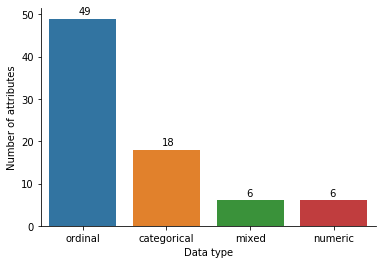

In [236]:
fig, ax1 = plt.subplots()
sns.countplot(data=feat_info_clean,
              x='type',
              ax=ax1)
ax1.set_ylabel('Number of attributes')
ax1.set_xlabel('Data type')
for p in ax1.patches:
    ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))
sns.despine(ax=ax1);

<a id='Step1.2.1'></a>
#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

Now, let us turn to the data types. As we noticed in [S0.3](#FeatInfoExplore), the `Data_Dictionary.md` provides the 5 following data types : "categorical", "ordinal", "numeric", "mixed", "interval".
We could already highlight that except the "numeric" ones, all other are also categorical data, either ordinal or discrete.
So as to be able to encode the categorical data as dummy variables, an homogenization of the data data is required here.

Now, before going any further, an insight to the type assigned to each of the categories is required in order to be able to accurately identify the ones to be re-encoded.
As we can see below, the categorical data are assigned a number of assignable values.

In [237]:
azdias_clean.ALTERSKATEGORIE_GROB.unique()

array([ 1.,  3.,  4.,  2., nan])

Whereas the largest part of the categorical feature columns are based on numeric assignable values, it can however be noticed some some other columns also encode their values on specific string codes (in form of mixed numeric-string values). This is the case here below:

In [238]:
azdias_clean.CAMEO_DEU_2015.unique()

array(['8A', '4C', '2A', '6B', '8C', '4A', '2D', '1A', '1E', '9D', '5C',
       '8B', '7A', '5D', '9E', nan, '9B', '1B', '3D', '4E', '4B', '3C',
       '5A', '7B', '9A', '6D', '6E', '2C', '7C', '9C', '7D', '5E', '1D',
       '8D', '6C', '6A', '5B', '4D', '3A', '2B', '7E', '3B', '6F', '5F',
       '1C'], dtype=object)

In [239]:
azdias_clean.OST_WEST_KZ.unique()

array(['W', 'O'], dtype=object)

Below, we will process to find the categories with only two possible values, referring to the binary features.

In [240]:
# Assess categorical variables: which are binary, which are multi-level, and
categorical_feat = feat_info_clean[feat_info_clean.type == "categorical"]["attribute"]

binary_feature = []
multi_level_feature=[]
for feature in categorical_feat:
    if (len(azdias_clean[feature].unique()) == 2):
        binary_feature.append(feature)
    elif (len(azdias_clean[feature].unique()) > 2):
        multi_level_feature.append(feature)
          
print('Binary categorical type is identified for attributes: {}'.format(binary_feature))
print('\nMulti-level categorical types is identified for attributes: {}'.format(multi_level_feature))

Binary categorical type is identified for attributes: ['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'OST_WEST_KZ']

Multi-level categorical types is identified for attributes: ['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'VERS_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']


This exploration of the data types tends to reveal that an important number of columns are providing multi-level categorical data types. More particularly, we can identify the following quantity :

In [241]:
print('Number of attributes with multi-level categorical types: {}'.format(len(multi_level_feature)))

Number of attributes with multi-level categorical types: 14


As it was the case above, dropping the 14 columns identified as multi-level categorical data type would deprive us from a very large quantity of of data for the following part of the analysis.
The assessment of the loss of data can be more accurately estimated :

In [242]:
print("A drop of all multi-level columns would result in a loss of {:.2f}% of the total amount of data".format(azdias_clean[multi_level_feature].count().sum() * 100 / azdias_clean.count().sum()))

A drop of all multi-level columns would result in a loss of 17.69% of the total amount of data


As this confirms, a drop of all multi-level categorical features would result in a loss of 17,69% of the amount of data of the `azdias_cleaned` demographic data, which will not be without implication for the classification processing.

In addition, qualitatively, it could also be mentioned that the removal of the above-mentioned columns will deprive the analysis from important features, when dealing with marketing strategy and market analysis, such as the shopper typology, the family type or even the social status.

<a id='Step1.2.1.2'></a>
##### Step 1.2.1.2: Re-Encode binary data

Moving on to the binary categorical data. First, it may be usefull to verify for each the range of assignable values.

In [243]:
for col in binary_feature:
    print("Assignable values for attribute {}: {}".format(col, azdias_clean[col].unique()))

Assignable values for attribute ANREDE_KZ: [2. 1.]
Assignable values for attribute GREEN_AVANTGARDE: [0 1]
Assignable values for attribute SOHO_KZ: [1. 0.]
Assignable values for attribute OST_WEST_KZ: ['W' 'O']


This confirms that **OST_WEST_KZ** needs to be re-encoded for replacing the characters 'W' and 'O' by numerical values.
Additionally, a translation of **ANREDE_KZ** to '0' and '1' binary values, for homogeneity with the other values has to be considered.
Taking action :

In [244]:
azdias_clean['VERS_TYP'].replace([2.0, 1.0], [1, 0], inplace=True)
azdias_clean['OST_WEST_KZ'].replace(['W', 'O'], [1, 0], inplace=True)
azdias_clean['ANREDE_KZ'].replace([2, 1], [1, 0], inplace=True)

In [245]:
azdias_clean[binary_feature].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798067 entries, 1 to 891220
Data columns (total 4 columns):
ANREDE_KZ           798067 non-null float64
GREEN_AVANTGARDE    798067 non-null int64
SOHO_KZ             798067 non-null float64
OST_WEST_KZ         798067 non-null int64
dtypes: float64(2), int64(2)
memory usage: 30.4 MB


One last step can be performed for the binary categorical data. For **ANREDE_KZ** and **SOHO_KZ** columns, our data assignable values are still defined in float. These can be converted into integers:

In [246]:
azdias_clean[binary_feature] = azdias_clean[binary_feature].astype(int)
azdias_clean[binary_feature].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798067 entries, 1 to 891220
Data columns (total 4 columns):
ANREDE_KZ           798067 non-null int32
GREEN_AVANTGARDE    798067 non-null int32
SOHO_KZ             798067 non-null int32
OST_WEST_KZ         798067 non-null int32
dtypes: int32(4)
memory usage: 18.3 MB


<a id='Step1.2.1.1'></a>
##### Step 1.2.1.1: Re-Encode multi-level categorical data

Taking a look to the multi-level categorical data, a specificity can be observed on two of these features :**CAMEO_DEUG_2015** and **CAMEO_DEU_2015**.

Actually, these two columns reflect the exact same information for the *Wealth* **and** *Life Stage* typologies. Whereas **CAMEO_DEUG_2015** provides the information at detailed level, **CAMEO_DEU_2015** defines the same at rough scale.
These values are directly observable in our current set of data, with exclusion of the 'unknown' values, which were already replaced in the previous [S1.1.1](#Step1.1.1).

In [247]:
azdias_clean.CAMEO_DEUG_2015.unique(), azdias_clean.CAMEO_DEU_2015.unique()

(array(['8', '4', '2', '6', '1', '9', '5', '7', nan, '3'], dtype=object),
 array(['8A', '4C', '2A', '6B', '8C', '4A', '2D', '1A', '1E', '9D', '5C',
        '8B', '7A', '5D', '9E', nan, '9B', '1B', '3D', '4E', '4B', '3C',
        '5A', '7B', '9A', '6D', '6E', '2C', '7C', '9C', '7D', '5E', '1D',
        '8D', '6C', '6A', '5B', '4D', '3A', '2B', '7E', '3B', '6F', '5F',
        '1C'], dtype=object))

The definition provided by `Data_Dictionary.md` provide us with the following indications of value allocation:

**CAMEO_DEU_2015**

*German CAMEO: Wealth / Life Stage Typology, detailed scale*
- 1A: Work-Life-Balance
- 1B: Wealthy Best Ager
- 1C: Successful Songwriter
- 1D: Old Nobility
- 1E: City Nobility
- 2A: Cottage Chic
- 2B: Noble Jogger
- 2C: Established gourmet
- 2D: Fine Management
- 3A: Career & Family
- 3B: Powershopping Families
- 3C: Rural Neighborhood
- 3D: Secure Retirement
- 4A: Family Starter
- 4B: Family Life
- 4C: String Trimmer
- 4D: Empty Nest
- 4E: Golden Ager
- 5A: Younger Employees
- 5B: Suddenly Family
- 5C: Family First
- 5D: Stock Market Junkies
- 5E: Coffee Rider
- 5F: Active Retirement
- 6A: Jobstarter
- 6B: Petty Bourgeois
- 6C: Long-established
- 6D: Sportgardener
- 6E: Urban Parents
- 6F: Frugal Aging
- 7A: Journeymen
- 7B: Mantaplatte
- 7C: Factory Worker
- 7D: Rear Window
- 7E: Interested Retirees
- 8A: Multi-culteral
- 8B: Young & Mobile
- 8C: Prefab
- 8D: Town Seniors
- 9A: First Shared Apartment
- 9B: Temporary Workers
- 9C: Afternoon Talk Show
- 9D: Mini-Jobber
- 9E: Socking Away
- XX: unknown

**CAMEO_DEUG_2015**

*German CAMEO: Wealth / Life Stage Typology, rough scale*
- -1: unknown
-  1: upper class
-  2: upper middleclass
-  3: established middleclass
-  4: consumption-oriented middleclass
-  5: active middleclass
-  6: low-consumption middleclass
-  7: lower middleclass
-  8: working class
-  9: urban working class
-  X: unknown

**CAMEO_DEU_2015**, among the other categorical columns has a particular singularity in the way the feature integrates non-numerical classification.

This brings us a constraint with the current version of *OneHotEncoder()* function from sklearn.preprocessing library, not able to support strings and only capable of discretizing integers. For this reason, a preliminary conversion of these string values codes to numerical format is required.

In [248]:
#change label of non-numerical category to numerical
labelencode = LabelEncoder()
azdias_clean['CAMEO_DEU_2015'] = labelencode.fit_transform(azdias_clean['CAMEO_DEU_2015'].astype(str))

Since **CAMEO_DEUG_2015** is redundant in terms of informations it carries, a complete removal of this feature may be considered. Indeed, extra but non-value-added data are not meaning of improved quality, it can be the exact opposite and even decrease the model performances.
In the same way, the `Data_Dictionary.md` reveal that :
- **LP_FAMILIE_FEIN** (Family type, fine scale) is doubled with **LP_FAMILIE_GROB** (Family type, rough scale) and,
- **LP_STATUS_FEIN** (Social status, fine scale) by **LP_STATUS_GROB** (Social status, rough scale).

Now, before dropping **CAMEO_DEUG_2015**, **LP_FAMILIE_GROB** and **LP_STATUS_GROB**, a comparison of the number of missing values with the same ratio in their complementary column is useful.

In [249]:
print("Quantity of null in CAMEO_DEU_2015: {} vs  CAMEO_DEUG_2015: {}".format(azdias_clean['CAMEO_DEU_2015'].isnull().sum(), azdias_clean['CAMEO_DEUG_2015'].isnull().sum()))
print("Quantity of null in LP_FAMILIE_FEIN : {} vs  LP_FAMILIE_GROB: {}".format(azdias_clean['LP_FAMILIE_FEIN'].isnull().sum(), azdias_clean['LP_FAMILIE_GROB'].isnull().sum()))
print("Quantity of null in LP_STATUS_FEIN : {} vs  LP_STATUS_GROB: {}".format(azdias_clean['LP_STATUS_FEIN'].isnull().sum(), azdias_clean['LP_STATUS_GROB'].isnull().sum()))

Quantity of null in CAMEO_DEU_2015: 0 vs  CAMEO_DEUG_2015: 6201
Quantity of null in LP_FAMILIE_FEIN : 31474 vs  LP_FAMILIE_GROB: 31474
Quantity of null in LP_STATUS_FEIN : 4749 vs  LP_STATUS_GROB: 4749


Interestingly, unlike **CAMEO_DEUG_2015**, the first category does not seem to contain null entries (whereas the second returns yet 6201 NaNs). Regarging the two other LP_FAMILIE and LP_STATUS, there is a full equivalence in the number of null entries in both attributes.
By the way, we can conclude that the drop of the redundant attributes **CAMEO_DEUG_2015**, **LP_FAMILIE_GROB** and **LP_STATUS_GROB** is fully achievable without apparent loss of information.

In [250]:
azdias_clean.drop("CAMEO_DEUG_2015", axis=1, inplace=True)
azdias_clean.drop("LP_FAMILIE_GROB", axis=1, inplace=True)
azdias_clean.drop("LP_STATUS_GROB", axis=1, inplace=True)
multi_level_feature.remove("CAMEO_DEUG_2015")
multi_level_feature.remove("LP_FAMILIE_GROB")
multi_level_feature.remove("LP_STATUS_GROB")

All pre-processing steps achieved, *OneHotEncoder()* function can be called on all multi-level categorical attributes to generate multiple dummy variables. 
From our (updated) list multi_level_feature, an iteration loop is created to convert all the columns.

In [279]:
azdias_clean2 = azdias_clean.copy()

In [280]:
for col in multi_level_feature:
    print(azdias_clean[col].unique())

[ 5.  3.  2.  4.  1.  6. nan]
[1. 6. 5. 2. 4. 3.]
[10.  1.  5. 12.  9.  3.  8. 11.  4.  2.  7.  6. nan]
[ 5.  1. nan 10.  2.  7. 11.  8.  4.  6.  9.  3.]
[ 2.  3.  9.  4.  1. 10.  5.  8.  6.  7. nan]
[ 1.  3.  2. nan]
[ 3.  2.  1.  0. nan]
[ 1.  0. nan]
[5. 3. 4. 1. 6. 2.]
[8. 1. 3. 2. 6. 4. 5.]
[35 15  5 25 37 13  8  0  4 42 20 36 30 21 43 44 40  1 12 17 14 11 18 31
 39 27 28  7 32 41 33 22  3 38 26 24 19 16  9  6 34 10 29 23  2]


In [274]:
azdias_clean['CJT_GESAMTTYP'].isnull().sum()

4749

In [281]:
def hotEncoder(df, cat_cols):
    '''
    Used to evaluate whether distributions of data between two DataFrames with the same columns are different.
    
    Input: 
        df - dataframe with columns to hot encode
        feature_list - list of categorical features to be converted with multiple dummy variables
    Output: none
    '''
    cat_cols_encoded = []
    
    df[cat_cols] = df[cat_cols].fillna(9999)
    print(df[cat_cols].isnull().sum())
    
    for col in cat_cols:
        cat_cols_encoded += [f"{col}_{cat}" for cat in list(df[col].unique())]

    oh_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    encoded_cols = oh_encoder.fit_transform(df[cat_cols])
    df_enc = pd.DataFrame(encoded_cols, columns=cat_cols_encoded)
    df_oh = df.join(df_enc)
    print(df_oh[cat_cols_encoded].isnull().sum())
    
    return df_oh, cat_cols_encoded

In [283]:
dummy_variable_feature = []
#Call hotEncoder on azdias_clean dataframe
azdias_clean2, dummy_variable_feature = hotEncoder(azdias_clean2, multi_level_feature)

#verify the created dummy variables
print("{} created dummy variables in the dataframe identified by columns:".format(len(dummy_variable_feature)))
dummy_variable_feature

CJT_GESAMTTYP       0
FINANZTYP           0
GFK_URLAUBERTYP     0
LP_FAMILIE_FEIN     0
LP_STATUS_FEIN      0
NATIONALITAET_KZ    0
SHOPPER_TYP         0
VERS_TYP            0
ZABEOTYP            0
GEBAEUDETYP         0
CAMEO_DEU_2015      0
dtype: int64
CJT_GESAMTTYP_5.0    83798
CJT_GESAMTTYP_3.0    83798
CJT_GESAMTTYP_2.0    83798
CJT_GESAMTTYP_4.0    83798
CJT_GESAMTTYP_1.0    83798
                     ...  
CAMEO_DEU_2015_34    83798
CAMEO_DEU_2015_10    83798
CAMEO_DEU_2015_29    83798
CAMEO_DEU_2015_23    83798
CAMEO_DEU_2015_2     83798
Length: 119, dtype: int64
119 created dummy variables in the dataframe identified by columns:


['CJT_GESAMTTYP_5.0',
 'CJT_GESAMTTYP_3.0',
 'CJT_GESAMTTYP_2.0',
 'CJT_GESAMTTYP_4.0',
 'CJT_GESAMTTYP_1.0',
 'CJT_GESAMTTYP_6.0',
 'CJT_GESAMTTYP_9999.0',
 'FINANZTYP_1.0',
 'FINANZTYP_6.0',
 'FINANZTYP_5.0',
 'FINANZTYP_2.0',
 'FINANZTYP_4.0',
 'FINANZTYP_3.0',
 'GFK_URLAUBERTYP_10.0',
 'GFK_URLAUBERTYP_1.0',
 'GFK_URLAUBERTYP_5.0',
 'GFK_URLAUBERTYP_12.0',
 'GFK_URLAUBERTYP_9.0',
 'GFK_URLAUBERTYP_3.0',
 'GFK_URLAUBERTYP_8.0',
 'GFK_URLAUBERTYP_11.0',
 'GFK_URLAUBERTYP_4.0',
 'GFK_URLAUBERTYP_2.0',
 'GFK_URLAUBERTYP_7.0',
 'GFK_URLAUBERTYP_6.0',
 'GFK_URLAUBERTYP_9999.0',
 'LP_FAMILIE_FEIN_5.0',
 'LP_FAMILIE_FEIN_1.0',
 'LP_FAMILIE_FEIN_9999.0',
 'LP_FAMILIE_FEIN_10.0',
 'LP_FAMILIE_FEIN_2.0',
 'LP_FAMILIE_FEIN_7.0',
 'LP_FAMILIE_FEIN_11.0',
 'LP_FAMILIE_FEIN_8.0',
 'LP_FAMILIE_FEIN_4.0',
 'LP_FAMILIE_FEIN_6.0',
 'LP_FAMILIE_FEIN_9.0',
 'LP_FAMILIE_FEIN_3.0',
 'LP_STATUS_FEIN_2.0',
 'LP_STATUS_FEIN_3.0',
 'LP_STATUS_FEIN_9.0',
 'LP_STATUS_FEIN_4.0',
 'LP_STATUS_FEIN_1.0',
 'LP_STAT

In [264]:
azdias_clean2.shape

(798067, 195)

In [272]:
azdias_clean2['CJT_GESAMTTYP_5.0'].isnull().sum()

83798

In [ ]:
azdias_clean[dummy_variable_feature] = azdias_clean[dummy_variable_feature].astype(int)
azdias_clean[dummy_variable_feature].info()

In [502]:
# Re-encode categorical variable(s) to be kept in the analysis.
#for feature in multi_level_feature:
    #One-hot encode column
#    ohe = OneHotEncoder(categories="auto")
#    azdias_clean2[feature] = azdias_clean2[feature].fillna(9999)
#    transformed = ohe.fit_transform(azdias_clean2[feature].values.reshape(-1,1)).toarray()
#    dfOneHot = pd.DataFrame(transformed, columns = [feature + "__" + str(int(i)) for i in range(transformed.shape[1])])
#    azdias_clean2 = pd.concat([azdias_clean2, dfOneHot], axis=1)

    #drop original column
#    azdias_clean2.drop(feature, axis=1, inplace = True)

#### Discussion 1.2.1: Re-Encode Categorical Features

PRAEGENDE_JUGENDJAHRE I replaced "PRAEGENDE_JUGENDJAHRE" with two new columns: movement and decade according to the mapping from the Data_Dictionary.md.

CAMEO_INTL_2015 I replaced "CAMEO_INTL_2015" with a column called cameo_intl according to the mapping from the Data_Dictionary.md.

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [503]:
# Assess mixed variables
mixed_feat = feat_info_clean[feat_info_clean.type == "mixed"]["attribute"]

mixed_feature=[]
for feature in mixed_feat:
    mixed_feature.append(feature)
    
print('"Mixed" data type is identified for attributes: {}'.format(mixed_feature))

"Mixed" data type is identified for attributes: ['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'PRAEGENDE_JUGENDJAHRE', 'WOHNLAGE', 'CAMEO_INTL_2015', 'PLZ8_BAUMAX']


In [504]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.



In [505]:
# which one needs to be re-encoded?

In [506]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.



#### Discussion 1.2.2: Engineer Mixed-Type Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding mixed-value features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [ ]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)



In [ ]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.



### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [1]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    
    
    # remove selected columns and rows, ...

    
    # select, re-encode, and engineer column values.

    
    # Return the cleaned dataframe.
    
    

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [ ]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.



In [ ]:
# Apply feature scaling to the general population demographics data.



### Discussion 2.1: Apply Feature Scaling

(Double-click this cell and replace this text with your own text, reporting your decisions regarding feature scaling.)

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [ ]:
# Apply PCA to the data.



In [ ]:
# Investigate the variance accounted for by each principal component.



In [ ]:
# Re-apply PCA to the data while selecting for number of components to retain.



### Discussion 2.2: Perform Dimensionality Reduction

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding dimensionality reduction. How many principal components / transformed features are you retaining for the next step of the analysis?)

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [ ]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.



In [ ]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.



In [ ]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.



### Discussion 2.3: Interpret Principal Components

(Double-click this cell and replace this text with your own text, reporting your observations from detailed investigation of the first few principal components generated. Can we interpret positive and negative values from them in a meaningful way?)

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [ ]:
# Over a number of different cluster counts...


    # run k-means clustering on the data and...
    
    
    # compute the average within-cluster distances.
    
    

In [ ]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.



In [ ]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.



### Discussion 3.1: Apply Clustering to General Population

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [ ]:
# Load in the customer demographics data.
customers = 

In [ ]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.



### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [ ]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.



In [ ]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?



In [ ]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?



### Discussion 3.3: Compare Customer Data to Demographics Data

(Double-click this cell and replace this text with your own text, reporting findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?)

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.